# Hackathon 1: simulations, descriptive stats & estimation

This project illustrates the course LEPL1109 with an industrial applications of simulations. You will analyse the performance of an assembly chain, analytically and with simulations. This is an introduction to supply chain management which is a field actively studied by engineers (see e.g. LINMA2470 Stochastic modelling). 

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Defrère Sacha - 51621900

Part. 2: Goffinet Dylan - 08471900

Part. 3: Moulin Guillaume - 43151900

Part. 4: Mottet Romain - 34391900

Part. 5: Sanderson Erwan- 40141800

Part. 6: Sonnet Thibaut - 6872124097

In a manufacture of mechanical devices for the automotive industry, the production of a gearbox is done by a line of 3 successive working stations. The production of a new gearbox starts only when the previous one is fully assembled. In what follows, the assembly time of one gearbox is denoted by $T$. Also, $T_k$ is the assembly time at machine $k$. Finally $\mu_k = \mathbb{E}(T_k)$ and $\sigma^2_k = \mathbb{V}(T)$. Details about the production line are provided in the graph below.

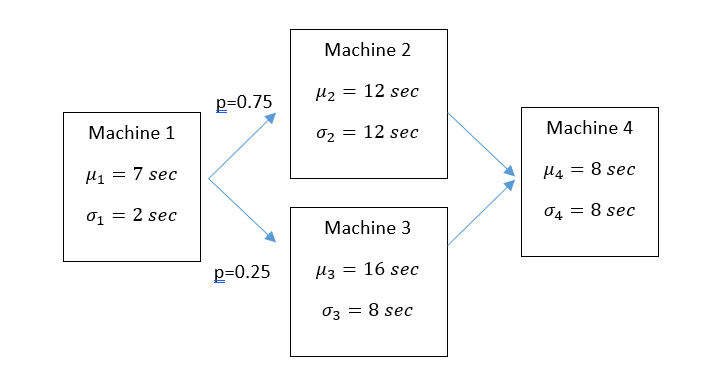

where $p=0.75$ indicates for example that the output of machine 1 ends up in machine 2 with probability $0.75$. 

------------------------------------------------------------------------------------------------------

1.	For each machine $k$, choose a (non-Gaussian) statistical distribution for the assembly time $T_k$ and provide value(s) for its parameter(s).

------------------------------------------------------------------------------------------------------

### Machine 1
Gamma distribution

Parameters: $\alpha _1 = \frac{\mu_1^2}{\sigma_1^2} = \frac{49}{4} = 12.25$ and $\beta _1 = \frac{\sigma_1^2}{\mu_1} = \frac{4}{7} \approx 0.571$

### Machine 2
Exponential distribution

Parameters: $\alpha _2 = \frac{\mu_2^2}{\sigma_2^2} = \frac{144}{144} = 1$ and $\beta _2 = \frac{\sigma_2^2}{\mu_2} = \frac{144}{12} = 12$

### Machine 3
Gamma distribution

Parameters: $\alpha _3 = \frac{\mu_3^2}{\sigma_3^2} = \frac{256}{64} = 4$ and $\beta _3 = \frac{\sigma_3^2}{\mu_3} = \frac{64}{16} = 4$

### Machine 4
Exponential distribution

Parameters: $\alpha _4 = \frac{\mu_4^2}{\sigma_4^2} = \frac{64}{64} = 1$ and $\beta _4 = \frac{\sigma_4^2}{\mu_4} = \frac{64}{8} = 8$

------------------------------------------------------------------------------------------------------------------------

b) Calculate the expected time for assembling one gearbox, $\mathbb{E}(T)$.

------------------------------------------------------------------------------------------------------------------------

$\mathbb{E}(T)$ = $\mu 1 + 0.75 \times \mu 2 + 0.25 \times \mu 3 + \mu 4$ = 28s

------------------------------------------------------------------------------------------------------

2. Simulate 5000 durations  $T$  for assembling one single gearbox and report the mean (check that its is well close to the expectation of question 1), standard deviation, 5% and 95% percentile. Plot an histogram. Save the simulated durations in a file "sample.csv".

------------------------------------------------------------------------------------------------------

Mean: 27.62489799318167s
Standard deviation: 13.479371202530498s
5% percentile: 10.613450523840978s
95% percentile: 52.94017779131942s


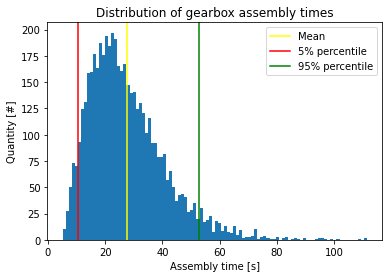

In [27]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt

m = [7, 12, 16, 8]   # Mu values
s = [2, 12, 8, 8]    # Sigma values
alpha = np.array(m) * np.array(m) / (np.array(s) * np.array(s))   # Corresponding alpha parameters
beta = np.array(s) * np.array(s) / np.array(m)   # Corresponding beta parameters

time = np.zeros(5000)

for i in range(0, 5000):   # Loop to create 5000 gearbox assembling times&
    time[i] += random.gammavariate(alpha[0], beta[0])
    p = random.choice([1, 1, 1, 2])
    time[i] += random.gammavariate(alpha[p], beta[p])
    time[i] += random.gammavariate(alpha[3], beta[3])

mean = time.sum() / time.size   # Mean, standard deviation and percentiles computations
print(f"Mean: {mean}s")
deviation = time.std()
print(f"Standard deviation: {deviation}s")
perc_5 = np.percentile(time, 5)
print(f"5% percentile: {perc_5}s")
perc_95 = np.percentile(time, 95)
print(f"95% percentile: {perc_95}s")

plt.title("Distribution of gearbox assembly times")   # Plotting
plt.ylabel("Quantity [#]")
plt.xlabel("Assembly time [s]")
plt.hist(time, bins=100)
plt.axvline(x=mean, label="Mean", color="yellow")
plt.axvline(x=perc_5, label="5% percentile", color="red")
plt.axvline(x=perc_95, label="95% percentile", color="green")
plt.legend()
plt.show()

f = open('sample.csv', 'w')   # Saving data
writer = csv.writer(f)
writer.writerow(time)
f.close()


------------------------------------------------------------------------------------------------------


3. a) Load simulated data from the file "sample.csv". Fit the exponential, gamma and chi-square distributions and estimate their parameters by log-likelihood maximization. Select the best non-Gaussian statistical distribution for  $T$. Justify your choice.

Rem: if you use scipy, set the location parameter to zero with option 'floc=0'.

------------------------------------------------------------------------------------------------------

We chose the gamma distribution because it is more representative of the data as it is wider but grows less in the middle compared to the chi-squared. The exponential just doesn't seem to accurately represent the data.

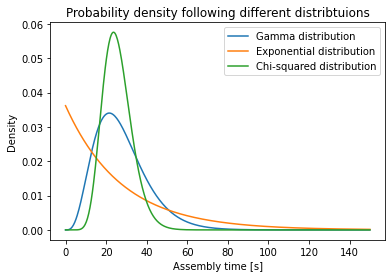

In [28]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

f = open('sample.csv', 'r')   # Load data
reader = csv.reader(f)

x = np.linspace(0, 150, 500, endpoint=True)   # Time abscissa, chosen to include all of (or most of in the worst case) the possible assembly times

for data in reader:
    if len(data) == 0:
        continue

    for i in range(len(data)):
        data[i] = float(data[i])
    data = np.array(data)

    gamma = scipy.stats.gamma.fit(data, floc=0)   # Fit the data values for gamma, exponential and chi-squared distributions
    exp = scipy.stats.expon.fit(data, floc = 0)
    chi = scipy.stats.chi2.fit(data, fscale=1, floc=0)

    plt.plot(x, scipy.stats.gamma.pdf(x, gamma[0], loc=gamma[1], scale=gamma[2]), label="Gamma distribution")   # Plot those fittings
    plt.plot(x, scipy.stats.expon.pdf(x, loc=exp[0], scale=exp[1]), label="Exponential distribution")
    plt.plot(x, scipy.stats.chi2.pdf(x, chi[0], loc=chi[1], scale=chi[2]), label="Chi-squared distribution")

f.close()
    
plt.title("Probability density following different distribtuions")
plt.xlabel("Assembly time [s]")
plt.ylabel("Density")
plt.legend()
plt.show()

b) During the lectures, we have seen that the chi-square distribution has only one single parameter (the number of degrees of freedom). In Scipy, we find two other parameters location "loc" and scale "scale". Why? 

To determine where we put the start of the distribution, its location. And to rescale it if it is needed / to force a scale to the graph.

------------------------------------------------------------------------------------------------------

c) Compare the empirical distribution with the distribution you chose at 3a). For this purpose, plot an histogram of  durations and add the probability density function (pdf) that you have selected for modelling the random variable.

------------------------------------------------------------------------------------------------------

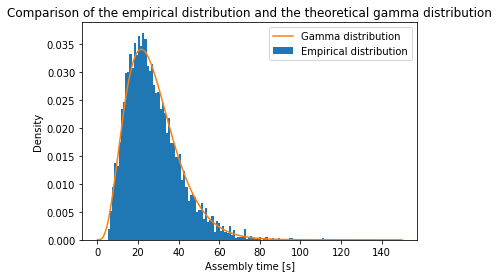

In [29]:
plt.title("Comparison of the empirical distribution and the theoretical gamma distribution")
plt.xlabel("Assembly time [s]")
plt.ylabel("Density")
plt.hist(time, bins=100, density=True, label="Empirical distribution")
plt.plot(x, scipy.stats.gamma.pdf(x, gamma[0], loc=gamma[1], scale=gamma[2]), label="Gamma distribution")
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------

4. We want to fit a Weibull distribution to $T$. The density, $f(t)$, depends upon two parameters $\alpha>0$ and $\lambda>0$ and is given by:

$$ f(t)=\lambda \alpha t^{\alpha-1} \exp(-\lambda t^\alpha) $$

a) Write two functions: one for the density and one that computes the log-likelihood of a sample of durations for this distribution. Test this function on the simulated dataset and for $\alpha=1$ and $\lambda=\frac{1}{28}$

------------------------------------------------------------------------------------------------------

Log-likelihood value with alpha=1 and gamma=1/28: -21594.040049658463


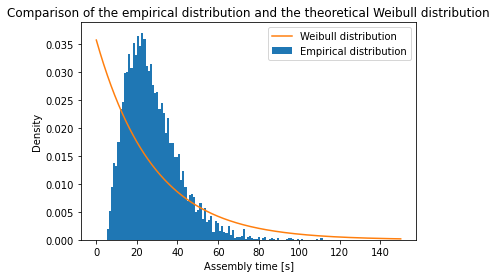

In [30]:
def density(args, sample):
    """
    Returns the probability density of a Weibull distribution of a precise assembly time, given a set of alpha and gamma parameters.
    
    :param args: tuple (alpha, gamma) containing the two parameters alpha and gamma needed for the density function
    :param sample: int/float (or numpy.array of int/float) containing an assembly time (or a set of times) to compute the density of
    :returns: float (or numpy.array of float) value(s) equal to the density of the time (or set of times) given those parameters
    """
    return args[1]*args[0]*(sample**(args[0]-1))*(np.exp(-args[1]*(sample**args[0])))

def log_likelihood(args, sample):
    """
    Returns the log-likelihood value of a density function on a weibull distribution, given a set of alpha and gamma parameters and a sample of assembly times
    
    :param args: tuple (alpha, gamma) containing the two parameters alpha and gamma needed for the density function
    :param sample: numpy.array of int/float containing a set of assembly times t compute the log-likelihood of
    :returns: float value equal to the log-likelihood of the sample of times given those parameters
    """
    dens = density(args, sample)
    return np.sum(np.log(dens))
            
x = np.linspace(0, 150, 500)
f = density((1, 1/28), x)
l1 = log_likelihood((1, 1/28), time)
print(f"Log-likelihood value with alpha=1 and gamma=1/28: {l1}")
plt.title("Comparison of the empirical distribution and the theoretical Weibull distribution")
plt.xlabel("Assembly time [s]")
plt.ylabel("Density")
plt.hist(time, bins = 100, density = True, label="Empirical distribution")
plt.plot(x, f, label="Weibull distribution")
plt.legend()
plt.show()


------------------------------------------------------------------------------------------------------

b) Maximize the log-likelihood to find estimates $\hat{\alpha}$ and $\hat{\lambda}$. Next compare the log-likelihood with those computed previously. Is this model better?

Hint: use the "scipy.optimize" package and the function "minimize". To avoid adding constraints, you can do a change of variables: $\alpha=\exp(a)$ and $\lambda=\exp(b)$. The function "minimize" may send back a warning (division by zero in log) but converges well to the solution.

------------------------------------------------------------------------------------------------------

C:\Users\sacha\AppData\Local\Temp/ipykernel_13944/505162908.py:27: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(dens))
C:\Users\sacha\OneDrive - UCL\Bureau\School\BAC3\Q5\LEPL1109 - Stats\lepl1109-env\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\sacha\AppData\Local\Temp/ipykernel_13944/505162908.py:27: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(dens))


𝛼̂=2.170988810672536, 𝜆̂=0.0005671299820834668
Log-likelihood value with alpha=𝛼̂ and gamma=𝜆̂: -19735.320256426287


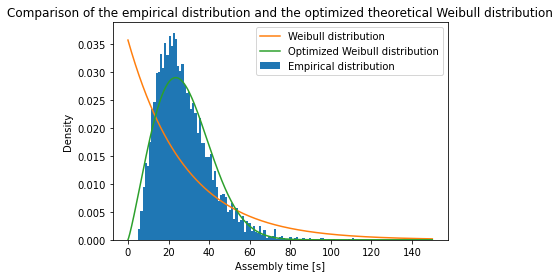

New likelihood: -19735.320256426287 > -21594.040049658463: previous likelihood => this new model is better, as can be seen when comparing the two graphs


In [31]:
from scipy.optimize import minimize

def density_modified(args, sample):
    """
    Idem as the density function for the Weibull distribution, except there is a change of variables alpha = exp(a) and gamma = exp(b)
    
    Returns the probability density of a Weibull distribution of a precise assembly time, given a set of alpha and gamma parameters.
    
    :param args: tuple (alpha, gamma) containing the two parameters alpha and gamma needed for the density function
    :param sample: int/float (or numpy.array of int/float) containing an assembly time (or a set of times) to compute the density of
    :returns: float (or numpy.array of float) value(s) equal to the density of the time (or set of times) given those parameters
    """
    args = np.exp(args[0]), np.exp(args[1])
    return args[1]*args[0]*(sample**(args[0]-1))*(np.exp(-args[1]*(sample**args[0])))

def log_likelihood_modified(args, sample):
    """
    Idem as the log_likelihood function, but slightly modified to accomodate the change of variables done in the function defined above
    
    Returns the log-likelihood value of a density function on a weibull distribution, given a set of alpha and gamma parameters and a sample of assembly times
    
    :param args: tuple (alpha, gamma) containing the two parameters alpha and gamma needed for the density function
    :param sample: numpy.array of int/float containing a set of assembly times t compute the log-likelihood of
    :returns: float value equal to the log-likelihood of the sample of times given those parameters
    """
    dens = density_modified(args, sample)
    return -np.sum(np.log(dens))

opti = minimize(log_likelihood_modified, (np.log(1), np.log(1/28),), args=time)   # Used to optimize the parameters values
opti_alpha = np.exp(opti.x[0])
opti_gamma = np.exp(opti.x[1])
l2 = log_likelihood((opti_alpha, opti_gamma), time)
print(f"𝛼̂={opti_alpha}, 𝜆̂={opti_gamma}")
print(f"Log-likelihood value with alpha=𝛼̂ and gamma=𝜆̂: {l2}")

plt.hist(time, bins = 100, density = True, label="Empirical distribution")
plt.xlabel("Assembly time [s]")
plt.ylabel("Density")
plt.plot(x, f, label="Weibull distribution")
plt.plot(x, density_modified((opti.x[0], opti.x[1]), x), label="Optimized Weibull distribution")
plt.title("Comparison of the empirical distribution and the optimized theoretical Weibull distribution")
plt.legend()
plt.show()
print(f"New likelihood: {l2} > {l1}: previous likelihood => this new model is better, as can be seen when comparing the two graphs")

------------------------------------------------------------------------------------------------------

c) The expectation and variance of the Weibull distribution are 
$$ \mathbb{E}(T)=\lambda^{-\frac{1}{\alpha}}\Gamma(\frac{1}{\alpha}+1) $$

$$ \mathbb{V}(T)=\lambda^{-\frac{2}{\alpha}} \left(  \Gamma(\frac{2}{\alpha}+1) -\Gamma(\frac{1}{\alpha}+1)^2  \right) $$

Estimate $\alpha$  and $\lambda$ by the methods of moments. Next calculate the log-likelihood with these estimates and compare with these obtained by log-likelihood maximization. Is the result surprising ?

Hint: use the scipy.optimize package and the function "root". The gamma function is scipy.special.gamma(z)

------------------------------------------------------------------------------------------------------

In [32]:
from scipy.special import gamma
from scipy.optimize import root

Variance= np.sum((time-mean)**2/(time.size-1))
                 
def esperance(args):
    lambd=np.exp(args[1])
    alpha=np.exp(args[0])
    return [lambd**(-1/alpha)*gamma(1/alpha+1)-mean,lambd**(-2/alpha)*(gamma(2/alpha+1)-gamma(1/alpha+1)**2)-Variance]

start=np.log((1,1/28))
sol=root(esperance,start)
reponse=log_likelihood(np.exp(sol.x),time)

print(f"Optimized parameters found with log-likelihood optimization: 𝛼̂={opti_alpha}, 𝜆̂={opti_gamma}")
print(f"And found with the moments method: 𝛼̂={np.exp(sol.x[0])}, 𝜆̂={np.exp(sol.x[1])}")
print(f"Finally, log-likelihood value found with log-likelihood optimization: {l2}")
print(f"And found with the moments method: {reponse}")
print("\nBoth techiniques give a similar result, but not because they started with the same goal estimate parameters.")

Optimized parameters found with log-likelihood optimization: 𝛼̂=2.170988810672536, 𝜆̂=0.0005671299820834668
And found with the moments method: 𝛼̂=2.159023749548854, 𝜆̂=0.0005946847411383766
Finally, log-likelihood value found with log-likelihood optimization: -19735.320256426287
And found with the moments method: -19735.497447869093

Both techiniques give a similar result, but not because they started with the same goal estimate parameters.


------------------------------------------------------------------------------------------------------

5.	Based on the content of the “Self-learning 2”, Bootstrap 1000 times the sample of durations simulated in Question 2 (stored in the file "sample.csv") and compute, the mean, standard deviation and 95% and 90% confidence interval for parameter(s) estimate(s). Plot the empirical distribution of parameter(s).

------------------------------------------------------------------------------------------------------

Mean: 27.631187269254035
Standard deviation: 0.19704456653822347
90% confidence: (27.620923381534237, 27.641451156973833)
95% confidence: (27.61895361226164, 27.643420926246428)


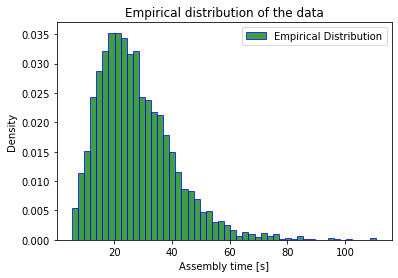

In [33]:
import statsmodels

f = open('sample.csv', 'r')
reader = csv.reader(f)

for data in reader:
    if len(data) == 0:
        continue

    for i in range(len(data)):
        data[i] = float(data[i])
    data = np.array(data)

    bet = np.zeros(1000)
    for i in range(1000) :
        data_b = random.choices(population=data, k=5000)
        res = scipy.stats.expon.fit(data=data_b, floc=0)
        bet[i] = res[1]

    mean = np.mean(bet)
    stanDev = np.std(bet)
    conf_90 = scipy.stats.t.interval(alpha=0.90, df=len(bet)-1, loc=mean, scale=scipy.stats.sem(bet))
    conf_95 = scipy.stats.t.interval(alpha=0.95, df=len(bet)-1, loc=mean, scale=scipy.stats.sem(bet))
    
    print(f"Mean: {mean}")
    print(f"Standard deviation: {stanDev}")
    print(f"90% confidence: {conf_90}")
    print(f"95% confidence: {conf_95}")
    
    plt.title("Empirical distribution of the data")
    plt.xlabel("Assembly time [s]")
    plt.ylabel("Density")
    plt.hist(data_b, 50, density=1, facecolor='g', alpha=0.75, edgecolor='b', label="Empirical Distribution")
    plt.legend()
    plt.show()

f.close()

-----------------------------------------------------------------------------------------------------

6. Using simulated assembling times, determine the probability that assembling 10 gearboxes lasts less than 320 seconds $P(T\leq 320\,sec)$. 

------------------------------------------------------------------------------------------------------

In [34]:
f = open('sample.csv', 'r')
reader = csv.reader(f)

for data in reader:
    if len(data) == 0:
        continue

    for i in range(len(data)):
        data[i] = float(data[i])
    data = np.array(data)
    
    N = 1000000
    count = 0
    for i in range(N) :
        assemTimes = random.choices(population=data, k=10)
        if np.sum(assemTimes) <= 320 :
            count += 1
    
    P = count/N
    print(P)

0.84946


------------------------------------------------------------------------------------------------------

7. Is there any alternative to numerical computing in question 6 for approximating  $P(T\leq 320\,sec)$? Please detail your answer and provide an estimate of this probability.

------------------------------------------------------------------------------------------------------

#### Mathematical way
We can find that probability using the Cumulative Distribution Function (cdf), written as:
$$ F(t) = P(T \leq t) = \int_0^t f(t)dt $$
Once we find the formula for $F(t)$, we can simply calculate $F(320)$ and get our probability.

#### Pythonic way
We can use the scipy.stats.norm.cdf(x, loc=0, scale=1) function to calculate this for us, with x being 320 (in our case), loc the mean and scale the standard deviation of our ten machines total assembly time.

In [38]:
ten_fold = np.zeros(5000)
for i in range(5000):
    ten_fold[i] = np.sum(np.random.choice(time, 10))   # Creating a new set of times, all corresponding to a ten-machine assembly time

ten_mean = ten_fold.sum() / ten_fold.size   # Computing the mean and standard deviation for this new set
ten_deviation = ten_fold.std()
cdf = scipy.stats.norm.cdf(320, loc=ten_mean, scale=ten_deviation)   # Computing the cdf to find the probability that our time is < 320
print(f"With a mean of {ten_mean} and a standard deviation of {ten_deviation}, we find:\nP(T <= 320s) = {cdf}, which is close to the numerical value we found ({P})")

With a mean of 277.0597440478474 and a standard deviation of 41.77123776704397, we find:
P(T <= 320s) = 0.8480218402440612, which is close to the numerical value we found (0.84946)
